# Selecting best performing ad using thompson sampling

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
# Importing the dataset
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
Ad 1     10000 non-null int64
Ad 2     10000 non-null int64
Ad 3     10000 non-null int64
Ad 4     10000 non-null int64
Ad 5     10000 non-null int64
Ad 6     10000 non-null int64
Ad 7     10000 non-null int64
Ad 8     10000 non-null int64
Ad 9     10000 non-null int64
Ad 10    10000 non-null int64
dtypes: int64(10)
memory usage: 781.3 KB


In [5]:
dataset.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [8]:
dataset.shape

(10000, 10)

In [9]:
dataset.describe()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,0.170300,0.129500,0.072800,0.119600,0.269500,0.012600,0.111200,0.209100,0.095200,0.04890
std,0.375915,0.335769,0.259821,0.324509,0.443722,0.111546,0.314395,0.406686,0.293506,0.21567
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [10]:
# Implementing Thompson Sampling
import random
N = 10000
d = 10
ads_selected = []
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d
total_reward = 0
for n in range(0, N):
    ad = 0
    max_random = 0
    for i in range(0, d):
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
        if random_beta > max_random:
            max_random = random_beta
            ad = i
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    if reward == 1:
        numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
    else:
        numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1
    total_reward = total_reward + reward

In [11]:
ads_selected

[6,
 3,
 5,
 9,
 7,
 1,
 8,
 2,
 4,
 0,
 6,
 1,
 1,
 9,
 6,
 4,
 1,
 4,
 5,
 3,
 0,
 7,
 5,
 8,
 8,
 8,
 8,
 5,
 0,
 4,
 3,
 9,
 0,
 1,
 0,
 0,
 6,
 5,
 4,
 8,
 4,
 3,
 4,
 4,
 1,
 1,
 1,
 2,
 4,
 8,
 4,
 4,
 3,
 4,
 2,
 4,
 9,
 2,
 7,
 4,
 2,
 4,
 7,
 4,
 2,
 4,
 2,
 4,
 8,
 4,
 3,
 2,
 7,
 4,
 4,
 3,
 2,
 2,
 2,
 4,
 4,
 9,
 4,
 8,
 4,
 5,
 6,
 5,
 4,
 3,
 8,
 2,
 6,
 7,
 2,
 4,
 7,
 1,
 4,
 4,
 3,
 2,
 8,
 4,
 4,
 9,
 7,
 1,
 2,
 0,
 4,
 4,
 8,
 0,
 4,
 4,
 8,
 6,
 4,
 7,
 0,
 8,
 4,
 7,
 0,
 1,
 2,
 7,
 4,
 7,
 0,
 4,
 0,
 4,
 9,
 7,
 4,
 0,
 5,
 1,
 0,
 1,
 2,
 4,
 8,
 4,
 4,
 0,
 4,
 8,
 7,
 7,
 3,
 8,
 4,
 4,
 4,
 4,
 0,
 8,
 6,
 7,
 8,
 7,
 4,
 0,
 7,
 0,
 4,
 8,
 0,
 0,
 7,
 1,
 4,
 8,
 4,
 8,
 9,
 6,
 4,
 4,
 8,
 8,
 4,
 8,
 0,
 7,
 7,
 2,
 0,
 8,
 7,
 5,
 7,
 4,
 7,
 4,
 4,
 9,
 8,
 2,
 4,
 7,
 8,
 4,
 4,
 8,
 0,
 8,
 4,
 8,
 4,
 6,
 0,
 4,
 5,
 3,
 9,
 2,
 0,
 0,
 7,
 0,
 7,
 7,
 8,
 0,
 4,
 0,
 0,
 0,
 7,
 6,
 4,
 4,
 0,
 1,
 6,
 8,
 7,
 8,
 0,
 4,
 2,
 7,
 0,
 1,
 4,
 1,


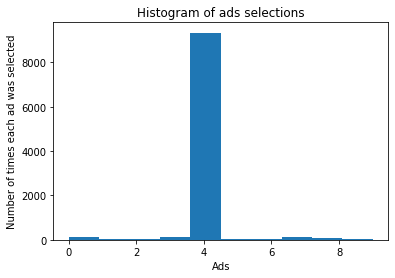

In [12]:
# Visualising the results - Histogram
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()